In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

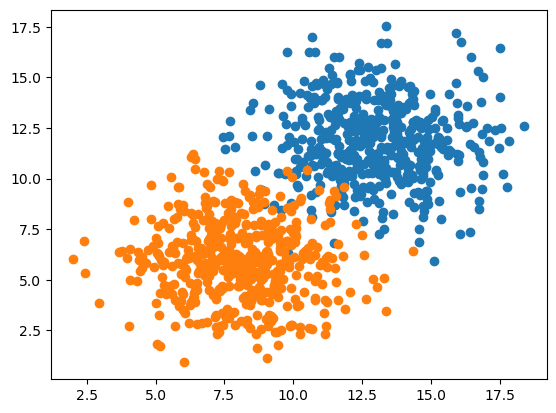

In [3]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

In [9]:
model = Sequential()
# units = 1 single oputput; input_shape = 2 number of input nodes x1,x2
model.add(Dense(units = 1, input_shape = (2, ), activation='sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x = X, y = y, verbose = 1, batch_size = 50, epochs = 500, shuffle = 'true')

Epoch 1/500
20/20 [==============================] - 1s 6ms/step - loss: 3.6648 - accuracy: 0.4730
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 1.1020 - accuracy: 0.4530
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6778 - accuracy: 0.5290
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5104 - accuracy: 0.8080
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.8630
Epoch 6/500
20/20 [==============================] - 0s 7ms/step - loss: 0.3875 - accuracy: 0.8860
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 0.3463 - accuracy: 0.9130
Epoch 8/500
20/20 [==============================] - 0s 5ms/step - loss: 0.3159 - accuracy: 0.9260
Epoch 9/500
20/20 [==============================] - 0s 10ms/step - loss: 0.2897 - accuracy: 0.9370
Epoch 10/500
20/20 [==============================] - 0s 8ms/step - loss: 0.2637 - accuracy: 0.9530
Epoch 11

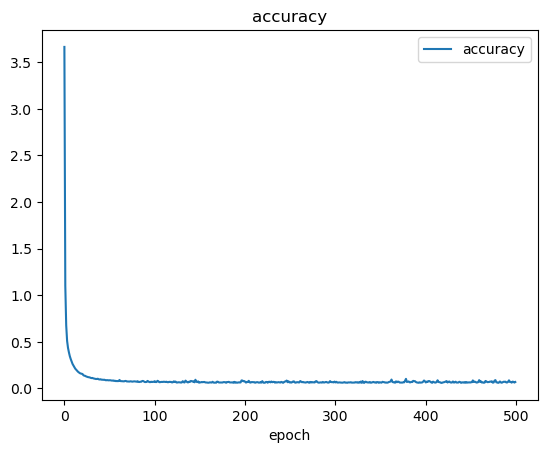

In [5]:
# plt.plot(h.history['accuracy'])
plt.plot(h.history['loss'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [6]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    # print(x_span)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    # print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 [==============================] - 1s 5ms/step


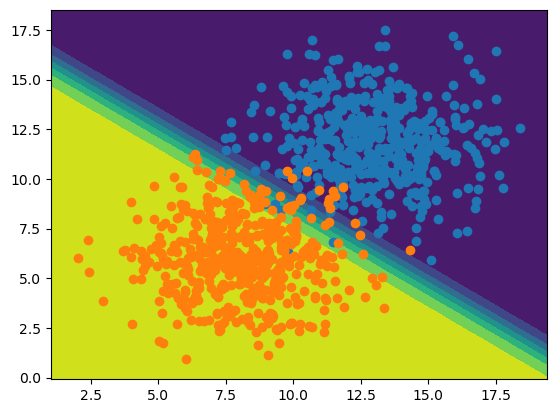

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

1/1 [==============================] - 0s 45ms/step
prediction is [[0.9999792]]


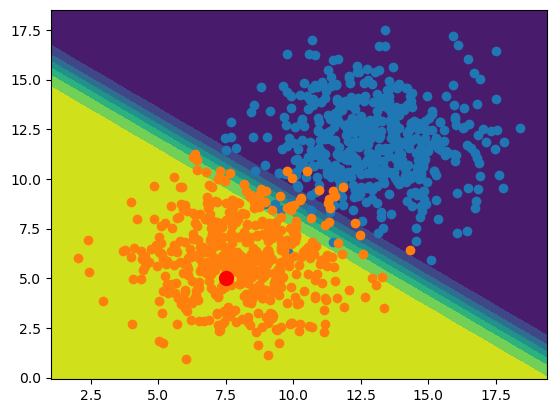

In [16]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = 'red')
print("prediction is", prediction)